# Basic SciPy KDE Example for Sanity Check

**NOTE: SCIPY KDE FUNCTION MAKES A LOT OF ASSUMPTIONS. LATER WILL TRANSTION TO STATSMODELS/OWN CODE.**

Initial running of KDE funciton independent of the overall pipeline function.

Start with initial imports.

In [25]:
from scipy import stats
import numpy as np

##### In this case, generate some random data. This example is being copied from documentation.

In [28]:
def measure(n):
    "Measurement model, return two coupled measurements."
    m1 = np.random.normal(size=n)
    m2 = np.random.normal(scale=0.5, size=n)
    return m1+m2, m1-m2

Get mins and maxes

In [29]:
m1, m2 = measure(2000)
xmin = m1.min()
xmax = m1.max()
print "Min:", xmin, "Max:", xmax 
ymin = m2.min()
ymax = m2.max()
print "Min:", ymin, "Max:", ymax 

Min: -3.64948240418 Max: 3.83870920922
Min: -5.00726564402 Max: 3.34013048271


##### Perform a kernel density estimate on the data:
Note:
- np.mgrid = mesh-grid- returned args have same shape, but densely packed array and not necessarily same result
- np.vstack = vertically stack arrays (row wise)
- np.ravel = take all values in matrix and put in 1D vector

In [40]:
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

In [86]:
print "Values:"
print values
print "X:"
print X
print "Y:"
print Y

Values:
[[-0.37839012  2.35284285 -0.44690255 ...,  1.1634706  -3.6494824
   1.47121964]
 [-0.53523804  2.55983029  0.45462812 ..., -0.1225551  -2.58911922
   0.90190282]]
X:
[-3.6494824  -3.6494824  -3.6494824  ...,  3.83870921  3.83870921
  3.83870921]
Y:
[[-5.00726564 -4.92294851 -4.83863138 ...,  3.17149622  3.25581335
   3.34013048]
 [-5.00726564 -4.92294851 -4.83863138 ...,  3.17149622  3.25581335
   3.34013048]
 [-5.00726564 -4.92294851 -4.83863138 ...,  3.17149622  3.25581335
   3.34013048]
 ..., 
 [-5.00726564 -4.92294851 -4.83863138 ...,  3.17149622  3.25581335
   3.34013048]
 [-5.00726564 -4.92294851 -4.83863138 ...,  3.17149622  3.25581335
   3.34013048]
 [-5.00726564 -4.92294851 -4.83863138 ...,  3.17149622  3.25581335
   3.34013048]]


In [85]:
print kernel(positions).shape
print "sweg"
print Z
print X.shape
print Z.shape

(10000L,)
sweg
[[  4.39874206e-06   5.68195992e-06   9.99990911e-06 ...,   1.46078839e-28
    4.25704050e-30   1.11100945e-31]
 [  8.67313097e-06   8.15328274e-06   1.21745003e-05 ...,   1.58926049e-27
    4.92150820e-29   1.36486858e-30]
 [  1.85733946e-05   1.35624661e-05   1.51753807e-05 ...,   1.57742514e-26
    5.19080288e-28   1.52971250e-29]
 ..., 
 [  3.34524023e-89   1.61796934e-86   7.00813990e-84 ...,   1.20445426e-03
    1.08467747e-03   9.03663098e-04]
 [  2.19263968e-91   1.12691952e-88   5.18690189e-86 ...,   9.68666304e-04
    8.95405180e-04   7.64850596e-04]
 [  1.31115224e-93   7.16079777e-91   3.50234718e-88 ...,   7.40184314e-04
    7.03925801e-04   6.17469061e-04]]
(10000L,)
(100L, 100L)


##### Plot results:

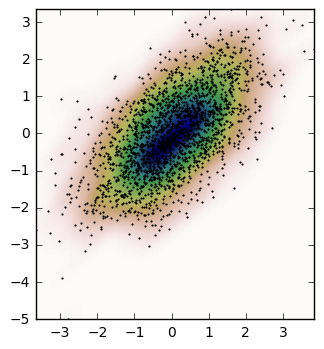

In [43]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
    extent=[xmin, xmax, ymin, ymax])
ax.plot(m1, m2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

##### What is happening in plot above?

Well, essentially, not 100% why some of the things above had to happen (e.g. why rotate kde 90 degrees?). Will figure out those specifics later. For now, understand KDE and the code syntax enough to make and understand relevant figures.

# Joint Probability

Method to temporarily joint probability. For now, using method similar to MATLAB's EEGLab (also which was used by the initial pipeline). It's entropy based (or at least similar to that eq), where:

$$P(x, ...) = -\sum\nolimits P(x) * log(P(x)) $$

While likely not optimal, as I believe it assumes all events are independent, will use for lack of better option.

In [65]:
import numpy as np

def jointprob(probarr):
    return -np.sum(np.multiply(probarr, np.log(probarr)))

Generate a small sample array to make testing easier

In [66]:
prob = [0.1, 0.2, 0.2, 0.1, 0.3, 0.1]

In [67]:
print jointprob(prob)

1.69574253417


In [68]:
print jointprob(Z)

452.856692132


Clearly my jointprob function has issues, as it returns a value over 1. However, for now, I will leave it, as it returns a value representative of the different probabilities in the funciton.